위키북스 '데이터 분석가가 반드시 알아야 할 모든 것'의 실습 필사입니다.

# 10.3 시간 시각화

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime # 날짜 가공에 필요

In [21]:
df = pd.read_csv('datasets/superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [22]:
# date 컬럼 날짜 형식 변환
# infer_datetime_format=True를 사용하면 pandas에서 알아서 날짜/시간 포맷을 추정하여 파싱
df['Date2'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df['Date2']

C:\Users\wldus\AppData\Local\Temp\ipykernel_24892\2640185890.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date2'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)


0      2017-08-11
1      2017-08-11
2      2017-12-06
3      2016-11-10
4      2016-11-10
          ...    
9795   2017-05-21
9796   2016-12-01
9797   2016-12-01
9798   2016-12-01
9799   2016-12-01
Name: Date2, Length: 9800, dtype: datetime64[ns]

In [23]:
# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')

# 연도 칼럼 생성
df['Year'] = df['Date2'].dt.year

In [24]:
# 선 그래프용 데이터셋 생성
# 2018년 데이터만 필터링
df_line = df[df.Year == 2018]

# 2018년 일자별 매출액 합계 집계
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-04,5972.988
2,2018-01-05,4108.370
3,2018-01-06,586.042
4,2018-01-07,639.830


## 선그래프 시각화

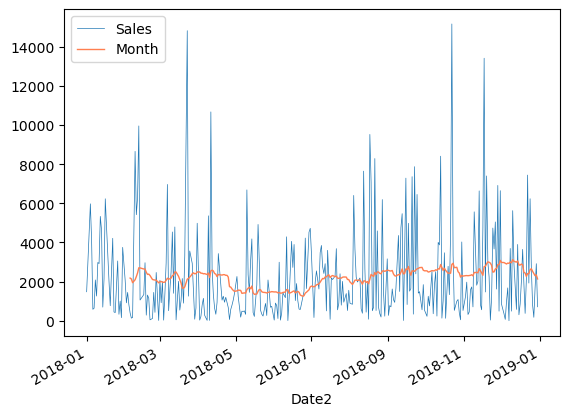

In [27]:
# 30일 이동 평균선 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

# 선 그래프 시각화
ax = df_line.plot(x='Date2', y='Sales', linewidth='0.5')
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth='1', ax=ax);


# 일자별 매출액의 편차가 커서 일매출 선으로는 전체적인 추이를 알기 힘들다.
# 이럴 경우, 이동 평균선을 사용하면 전체적인 추이를 직관적으로 확인할 수 있다.
# 2018년 5월부터 감소하는 추이였지만 8월 이후로 상승하는 것을 볼 수 있다.

In [28]:
# 연도별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()
df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


## 막대 그래프 시각화

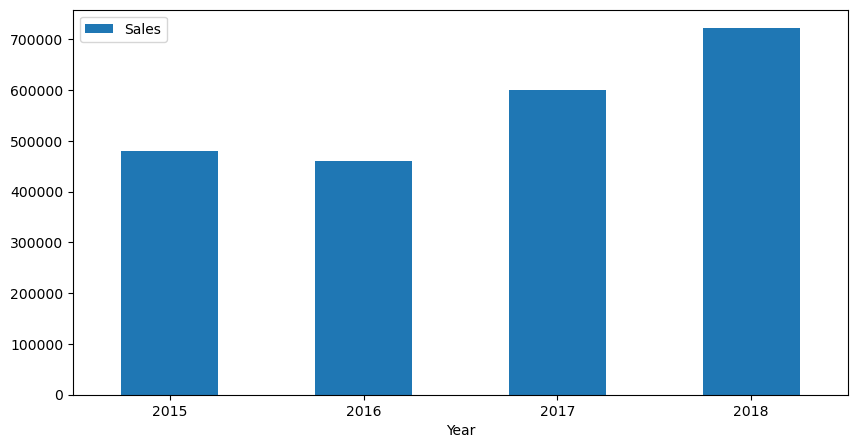

In [29]:
# 연도별 매출액 막대 그래프 시각화
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=0, figsize=(10,5))

# rot: x축 레이블 각도

In [30]:
# 연도별, 고객 세그먼트별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df_bar_2.pivot(index='Year', columns='Segment', values='Sales').reset_index()
df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


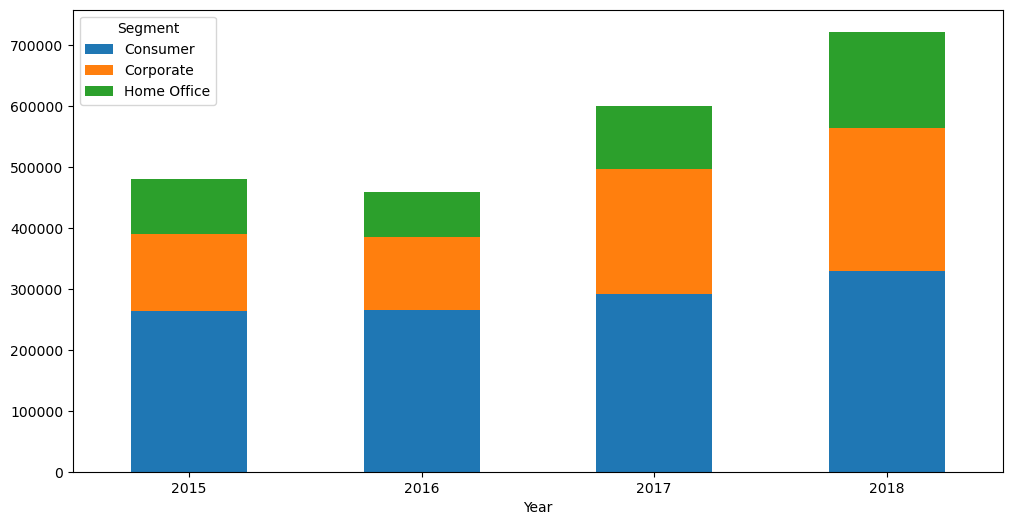

In [34]:
# 연도별 고객 세그먼트별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, rot=0, figsize=(12,6));